In [1]:
using LinearAlgebra
using NBInclude
using Plots

In [3]:
function initgrid(L0,h,N)
    X = [ -L0 + h*(i-1) for i=1:N+1]
    0.5(X[1:N]+X[2:N+1])
end
function sol1(X)
    1. - 0.5(X.^2 + X)
end
function sol2(X)
    n = length(X)
    a = cos.(pi*(X+0.5(ones(n)))).^5
    b = zeros(n)
    out = mymax(b,a)
end
function sol3(X)
    out = Array{Float64,1}(undef,0)
    for i = 1:length(X)
    (X[i] > -0.75) && (X[i] < -0.25) ? push!(out,1) : push!(out,0)
    end
    out
end
function mymax(X::AbstractVector{T},Y::AbstractVector{T}) where {T<:Number}
    out = Array{Float64,1}(undef,0)
    for i = 1:length(X)
    X[i] > Y[i] ? push!(out,X[i]) : push!(out,Y[i])
    end
    out
end
function rc(a::T,b::T) where {T<:Number}
    0.5(a + b)
end
function a_in(a::T) where {T<:Number}
    a > 0 ? a : 0
end
function a_ou(a::T) where {T<:Number}
    a < 0 ? a : 0
end
function dlddu(N)
    dl = Array{Float64,1}(undef,0);
    d = Array{Float64,1}(undef,0);
    du = Array{Float64,1}(undef,0);
    upp = zeros(N);
    up = zeros(N);
    dl, d, du, upp, up;
end

function solvertri(dl::V, d::V, du::V, b::V) where V <: AbstractVector
    A = Tridiagonal(dl, d, du)
    #print(A)
    x = A\b
end

solvertri (generic function with 1 method)

In [2]:
function inou(ana::V,i::U,tau::T,h::T,up::V,u::V,v::V) where {T<:Number, V <: AbstractVector, U<:Int64}
    n = length(v)
    m = (tau/(2*h))
    if (i<2)
        c = m*a_ou(rc(v[i],v[end]))
        e = m*a_ou(-rc(v[i],v[i+1]))
        up[i] = (1.0 - c - e)*u[i] + e*u[i+1]
    elseif (i>(n-1))
        c = m*a_ou(rc(v[i],v[i-1]))
        e = m*a_ou(-rc(0.0,0.0))
        up[i] = c*u[i-1] + (1.0 - c - e)*u[i]
    else
        c = m*a_ou(rc(v[i],v[i-1]))
        e = m*a_ou(-rc(v[i],v[i+1]))
        up[i] = c*u[i-1] + (1.0 - c - e)*u[i] + e*u[i+1]
    end
end
function inou(i::U,tau::T,h::T,dl::V,d::V,du::V,v::V) where {T<:Number, V <: AbstractVector, U<:Int64}
    n = length(v)
    m = (tau/(2*h))
    if (i<2)
        a = m*a_in(rc(v[i],v[end]))
        b = m*a_in(-rc(v[i],v[i+1]))
        push!(d, 1.0)#(1.0 + a + b))
        push!(du, 0.0)
    elseif (i>(n-1))
        a = m*a_in(rc(v[i],v[i-1]))
        b = m*a_in(-rc(v[i],v[1]))
        push!(dl, 0.0)
        push!(d, 1.0)#(1.0 + a +b))
    else
        a = m*a_in(rc(v[i],v[i-1]))
        b = m*a_in(-rc(v[i],v[i+1]))
        push!(dl, -a)
        push!(d, (1.0 + a +b))
        push!(du, -b)
    end
end

inou (generic function with 2 methods)

In [4]:
methods(inou)

# 2 methods for generic function "inou":
[1] inou(ana::V, i::U, tau::T, h::T, up::V, u::V, v::V) where {T<:Number, V<:(AbstractArray{T,1} where T), U<:Int64} in Main at In[2]:2
[2] inou(i::U, tau::T, h::T, dl::V, d::V, du::V, v::V) where {T<:Number, V<:(AbstractArray{T,1} where T), U<:Int64} in Main at In[2]:19

In [36]:
N = 160;
L0 = 1;
h = 2*L0/N
v = 1. *ones(N);
v2 = 1. *ones(N+2);
#v = sol3(X);
tau = 80*h
nt = 1
X = initgrid(L0,h,N);
Y = initgrid(L0+h,h,N+2);

In [37]:
u1 = sol1.(X)
u2 = sol2(X)
u3 = sol3(X);

In [38]:
u = u1
for j = 1:nt
    dl, d, du, upp, up = dlddu(N);
    ana = sol1.(Y - v2*tau*j);
    for i = 1:N
        upp[i] = inou(ana,i,tau,h,up,u,v)
        inou(i,tau,h,dl,d,du,v)
    end
    upp[1] = ana[2];
    upp[end] = ana[end-1];
    u = solvertri(dl, d, du, upp);
    #u[1] = ana[1];
    #u[end] = ana[end];
end

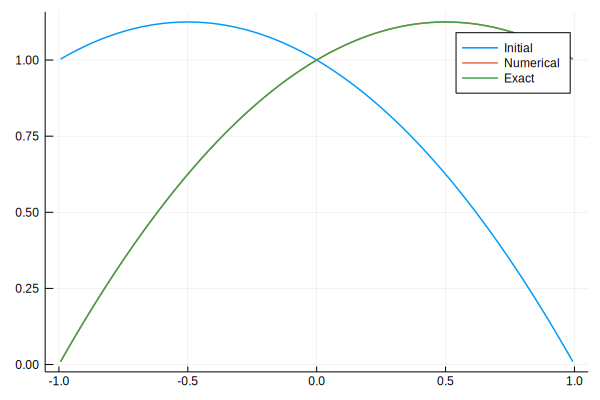

In [39]:
plot(X,[u1,u,sol1.(X - v*tau*nt)],label=["Initial" "Numerical" "Exact" ],lw = 1.5)

In [40]:
ana = sol1.(X - v*tau*nt);
e = 0.0;

In [41]:
for i = 1:length(ana)
    e += sqrt((u[i]-ana[i])^2)
end

In [42]:
e

3.1041141879128986e-14